# Visualization


## EPA Dataset 

In [28]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [29]:
epa = pd.read_csv('https://raw.githubusercontent.com/sqlshep/SQLShepBlog/master/data/epaMpg.csv')

In [30]:
epa.tail()

,RowNumber,Represented.Test.Veh.Make,Model,Vehicle.Type,HorsePower,Cylinders,Tested.Transmission.Type.Code,Tested.Transmission.Type,Gears,Drive.System.Code,Weight,AxleRatio,Test.Procedure.Cd,Test.Procedure.Description,Test.Fuel.Type.Cd,Test.Fuel.Type.Description,FuelEcon
1029,1036,Volvo,XC60 T8 AWD,Both,313,4,SA,Semi-Automatic,8,A,5000,3.33,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,33.1
1030,1037,Volvo,XC90 T5 AWD,Both,250,4,SA,Semi-Automatic,8,F,5000,3.33,31,Federal fuel 3-day exhaust,61,Tier 2 Cert Gasoline,27.4
1031,1038,Volvo,XC90 T5 FWD,Both,250,4,SA,Semi-Automatic,8,F,4750,3.33,31,Federal fuel 3-day exhaust,61,Tier 2 Cert Gasoline,28.6
1032,1039,Volvo,XC90 T6 AWD,Both,316,4,SA,Semi-Automatic,8,F,5000,3.33,3,HWFE,61,Tier 2 Cert Gasoline,37.9
1033,1040,Volvo,XC90 T8 AWD,Both,313,4,SA,Semi-Automatic,8,A,5500,3.33,21,Federal fuel 2-day exhaust (w/can load),61,Tier 2 Cert Gasoline,33.3


In [31]:
epa.columns

Index(['RowNumber', 'Represented.Test.Veh.Make', 'Model', 'Vehicle.Type',
       'HorsePower', 'Cylinders', 'Tested.Transmission.Type.Code',
       'Tested.Transmission.Type', 'Gears', 'Drive.System.Code', 'Weight',
       'AxleRatio', 'Test.Procedure.Cd', 'Test.Procedure.Description',
       'Test.Fuel.Type.Cd', 'Test.Fuel.Type.Description', 'FuelEcon'],
      dtype='object')

In [32]:
epa.shape

(1034, 17)

In [33]:
epa.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,1034.0,521.361702,300.241933,1.00,262.250,520.50,781.75,1040.00
HorsePower,1034.0,291.824952,144.294932,72.00,181.000,271.50,355.00,1500.00
Cylinders,1034.0,5.431335,1.905214,3.00,4.000,4.00,6.00,16.00
Gears,1034.0,6.509671,1.992824,1.00,6.000,7.00,8.00,10.00
Weight,1034.0,4191.852031,787.821434,2375.00,3625.000,4000.00,4750.00,6500.00
AxleRatio,1034.0,3.411064,0.586484,1.56,3.070,3.36,3.70,5.44
Test.Procedure.Cd,1034.0,24.993230,22.078601,2.00,11.000,21.00,31.00,95.00
Test.Fuel.Type.Cd,1034.0,56.366538,11.633650,19.00,61.000,61.00,61.00,61.00
FuelEcon,1034.0,28.216538,9.496233,9.20,21.525,26.80,33.40,71.60


In [34]:
#Drop the row number
epa = epa.drop(epa.columns[[0]], axis=1)

#replace the "." in the column names with "_"
epa.columns = epa.columns.str.replace('.', '_')

### Visualizations 

array([[<AxesSubplot:title={'center':'Cylinders'}>]], dtype=object)

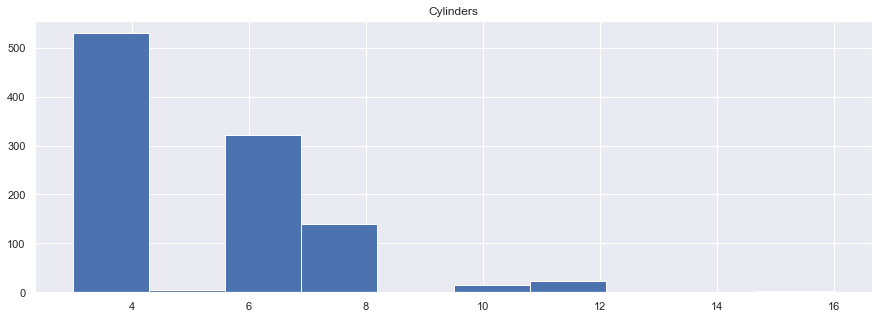

In [35]:
epa.hist('Cylinders', figsize=(15,5))

array([[<AxesSubplot:title={'center':'FuelEcon'}>]], dtype=object)

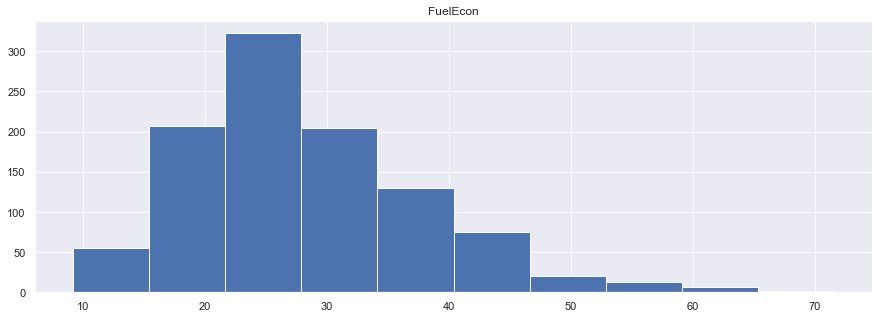

In [36]:
epa.hist('FuelEcon', figsize=(15,5))

<AxesSubplot:xlabel='HorsePower', ylabel='Cylinders'>

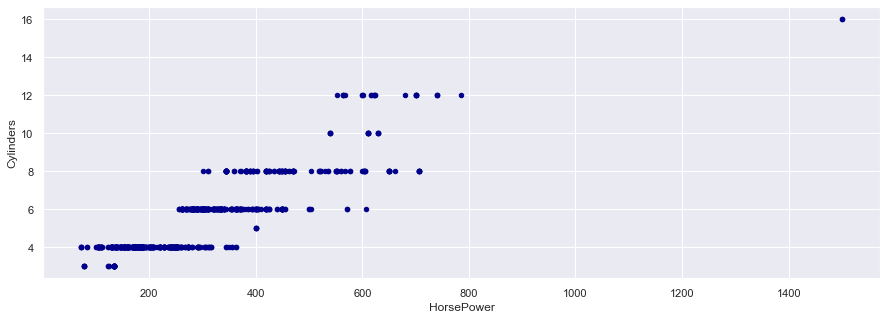

In [37]:
epa.plot.scatter(x='HorsePower',
                    y='Cylinders',
                    c='DarkBlue',
                    figsize=(15,5))

<AxesSubplot:xlabel='HorsePower', ylabel='Weight'>

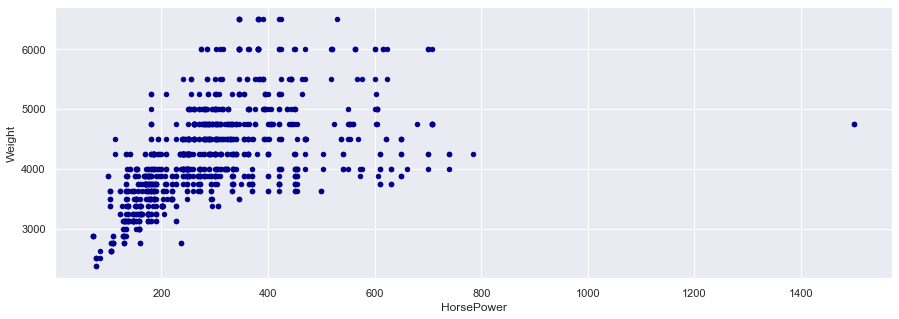

In [38]:
epa.plot.scatter(x='HorsePower',
                      y='Weight',
                      c='DarkBlue',
                figsize=(15,5))

<AxesSubplot:xlabel='HorsePower', ylabel='FuelEcon'>

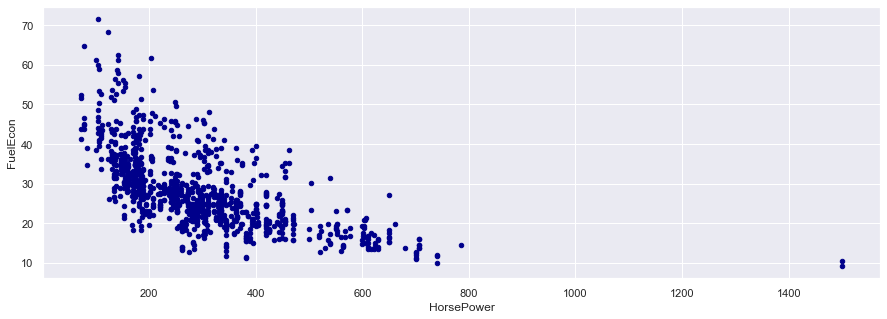

In [39]:
epa.plot.scatter(x='HorsePower',
                      y='FuelEcon',
                      c='DarkBlue',
                figsize=(15,5))

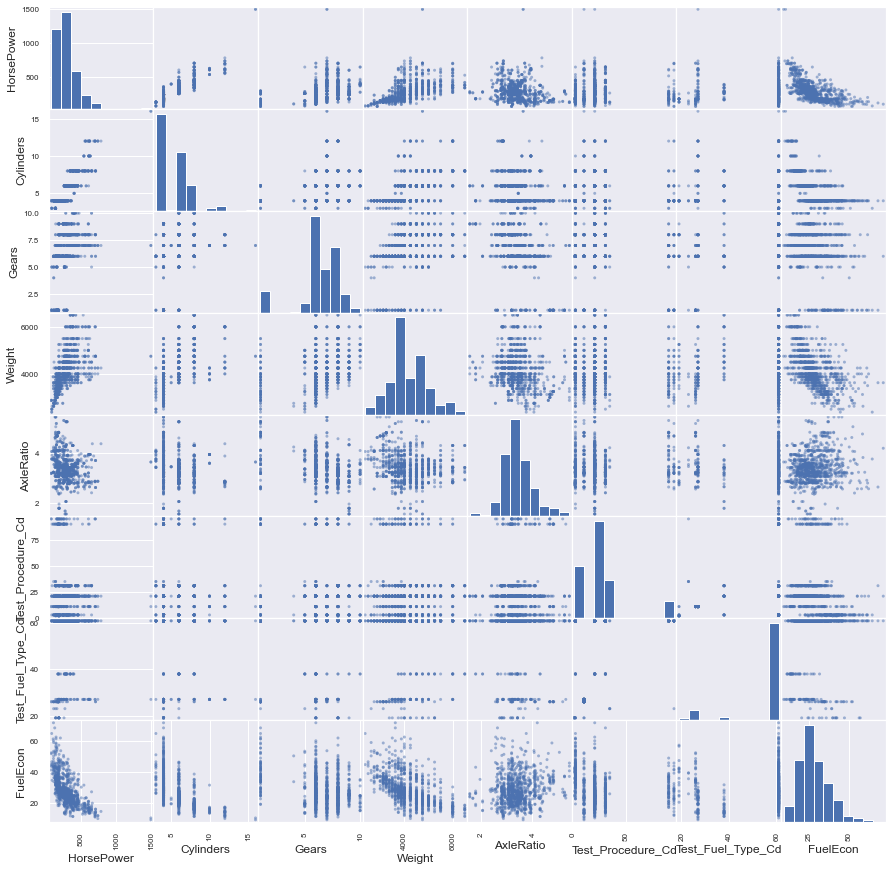

In [40]:
plot = pd.plotting.scatter_matrix(epa,
                figsize=(15,15))


<AxesSubplot:>

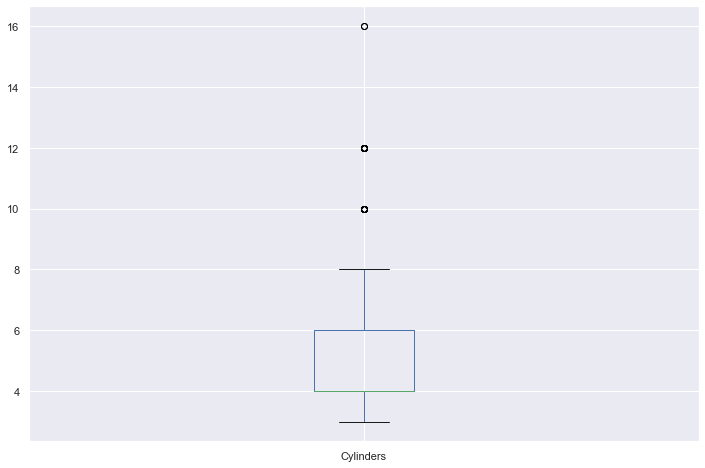

In [41]:
epa['Cylinders'].plot.box()

<AxesSubplot:>

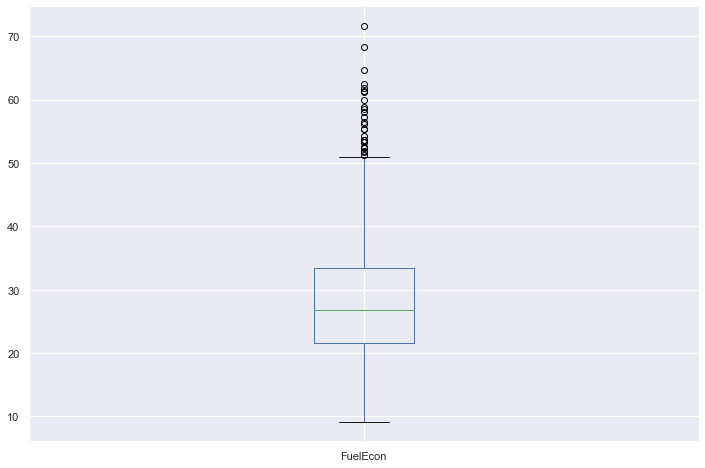

In [42]:
epa['FuelEcon'].plot.box()

In [43]:
epa.corr()

,HorsePower,Cylinders,Gears,Weight,AxleRatio,Test_Procedure_Cd,Test_Fuel_Type_Cd,FuelEcon
HorsePower,1.000000,0.878153,0.379275,0.523104,-0.183797,-0.058215,0.029944,-0.629558
Cylinders,0.878153,1.000000,0.278601,0.604601,-0.176664,-0.071848,-0.000458,-0.607808
Gears,0.379275,0.278601,1.000000,0.347080,-0.450773,-0.141657,0.150021,-0.336328
Weight,0.523104,0.604601,0.347080,1.000000,-0.200765,-0.057187,0.026476,-0.571316
AxleRatio,-0.183797,-0.176664,-0.450773,-0.200765,1.000000,0.058199,-0.029499,0.124107
Test_Procedure_Cd,-0.058215,-0.071848,-0.141657,-0.057187,0.058199,1.000000,0.225023,-0.164242
Test_Fuel_Type_Cd,0.029944,-0.000458,0.150021,0.026476,-0.029499,0.225023,1.000000,0.064498
FuelEcon,-0.629558,-0.607808,-0.336328,-0.571316,0.124107,-0.164242,0.064498,1.000000


<AxesSubplot:>

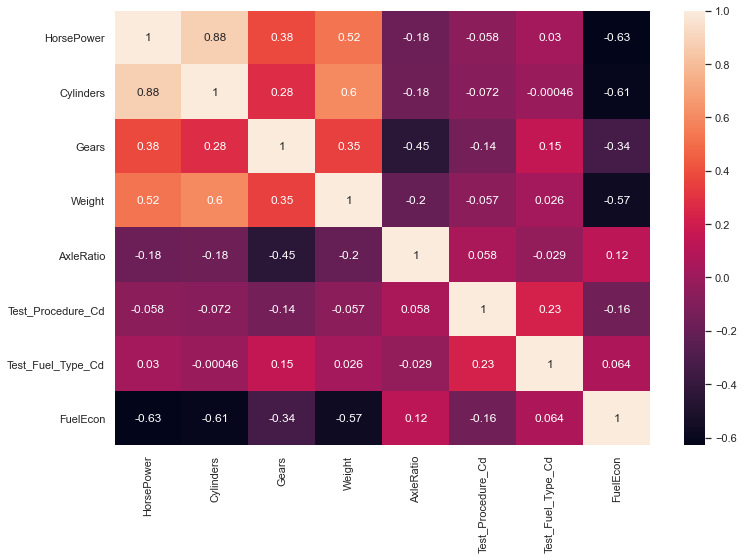

In [44]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(epa.corr(), annot = True)


In [45]:
# Types of object are character string
epa.dtypes

Represented_Test_Veh_Make         object
Model                             object
Vehicle_Type                      object
HorsePower                         int64
Cylinders                          int64
Tested_Transmission_Type_Code     object
Tested_Transmission_Type          object
Gears                              int64
Drive_System_Code                 object
Weight                             int64
AxleRatio                        float64
Test_Procedure_Cd                  int64
Test_Procedure_Description        object
Test_Fuel_Type_Cd                  int64
Test_Fuel_Type_Description        object
FuelEcon                         float64
dtype: object

In [46]:
epa['Tested_Transmission_Type_Code']= epa['Tested_Transmission_Type_Code'].astype('category')
    
epa['Drive_System_Code']= epa['Drive_System_Code'].astype('category')

In [47]:
epa.dtypes

Represented_Test_Veh_Make          object
Model                              object
Vehicle_Type                       object
HorsePower                          int64
Cylinders                           int64
Tested_Transmission_Type_Code    category
Tested_Transmission_Type           object
Gears                               int64
Drive_System_Code                category
Weight                              int64
AxleRatio                         float64
Test_Procedure_Cd                   int64
Test_Procedure_Description         object
Test_Fuel_Type_Cd                   int64
Test_Fuel_Type_Description         object
FuelEcon                          float64
dtype: object